In [1]:
import pandas as pd
from utilidades_graficas import *

In [2]:
archivo_resultados = pd.read_excel('out_doble.xlsx')
archivo_resultados.head()

,platform,method,size,iterations,time,accuracy,dispersion
0,cuda,jacobi,500,15,0.369718,3.846334e-16,8.110625e-16
1,cuda,GD,500,24,0.838247,1.256322e-15,3.965990e-15
2,cuda,CG,500,19,0.678831,7.058809e-16,2.698037e-15
3,numpy,jacobi,500,13,0.005186,3.990006e-16,1.763165e-15
4,numpy,GD,500,21,0.002247,7.260754e-16,2.419640e-15


In [3]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'iteraciones_promedio', 'std_iteraciones',
            'tiempo_promedio', 'std_tiempo', 'precision_promedio', 'std_precision', 
            'dispersion_promedio', 'std_dispersion']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size'] == tamaño]
            descripcion_iteraciones = describir(tabla['iterations'])
            descripcion_tiempo = describir(tabla['time'])
            descripcion_error = describir(tabla['accuracy'])
            descripcion_dispersion = describir(tabla['dispersion'])
            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_iteraciones +
                            descripcion_tiempo + descripcion_error + descripcion_dispersion]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,iteraciones_promedio,std_iteraciones,tiempo_promedio,std_tiempo,precision_promedio,std_precision,dispersion_promedio,std_dispersion
0,cuda,jacobi,500,15.0,0.000000,0.239461,0.046079,4.069477e-16,2.361652e-17,8.490327e-16,7.191749e-17
1,cuda,jacobi,1000,11.2,0.421637,0.189827,0.008253,6.246271e-16,6.068950e-17,7.579286e-15,3.788281e-15
2,cuda,jacobi,1500,13.0,0.000000,0.251929,0.005824,6.571602e-16,2.494434e-17,1.086762e-15,9.464286e-17
3,cuda,jacobi,2000,12.1,0.316228,0.273394,0.006242,8.035418e-16,3.474928e-17,8.304973e-15,2.855521e-15
4,cuda,jacobi,2500,10.0,0.000000,0.270105,0.005888,7.246091e-16,2.095269e-17,3.902837e-15,1.652192e-16


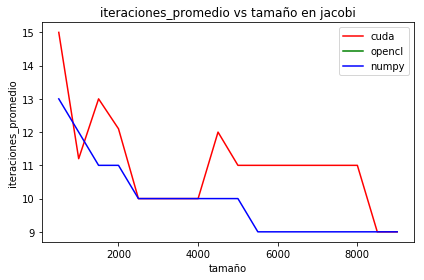

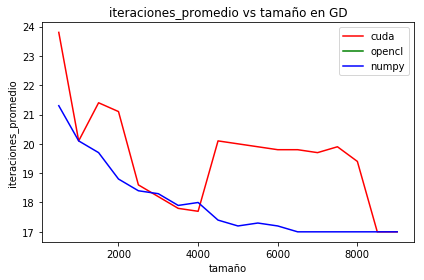

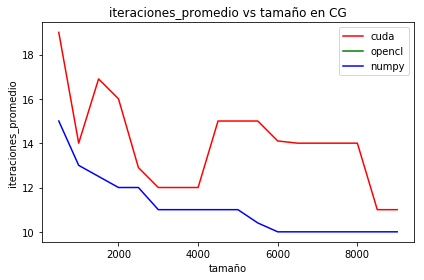

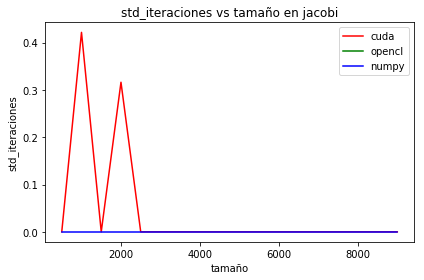

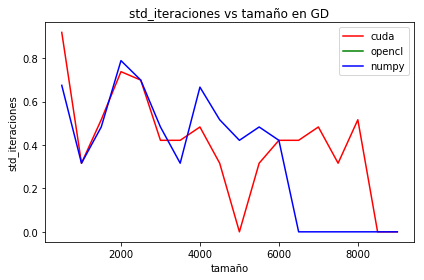

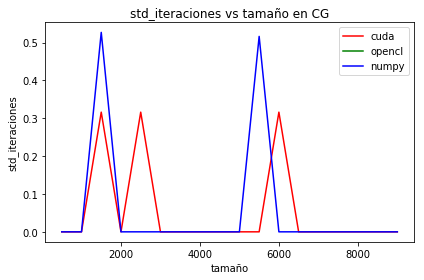

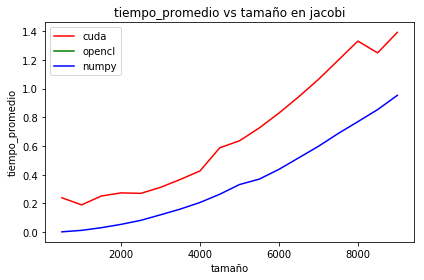

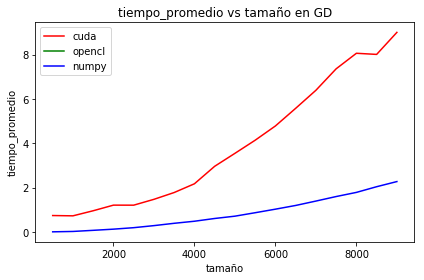

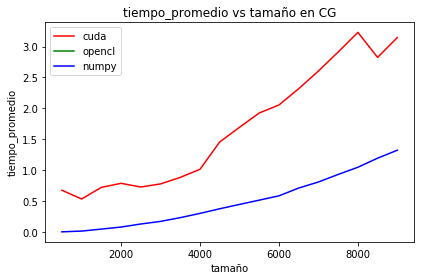

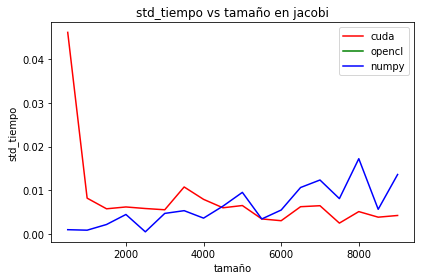

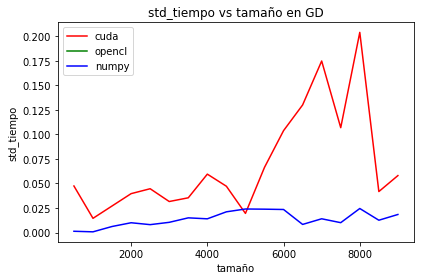

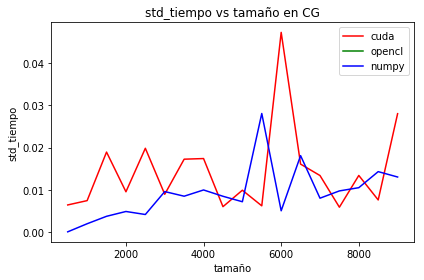

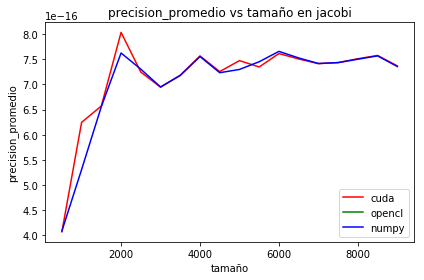

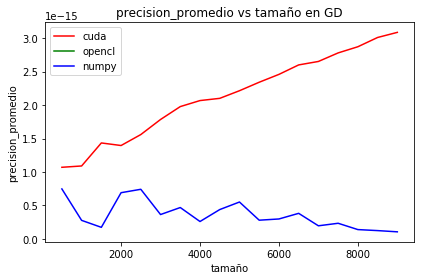

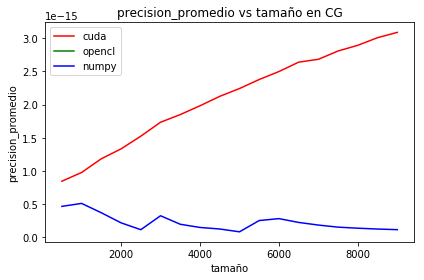

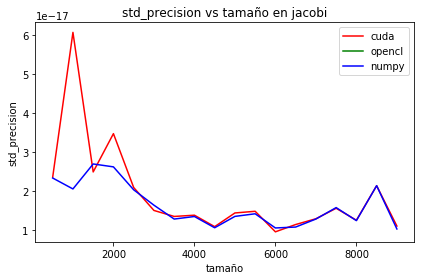

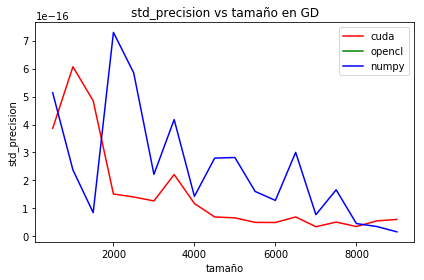

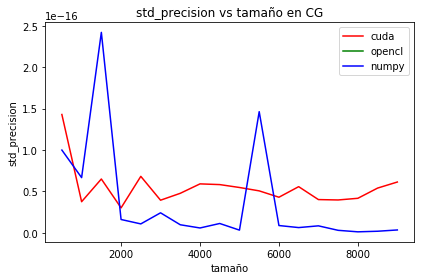

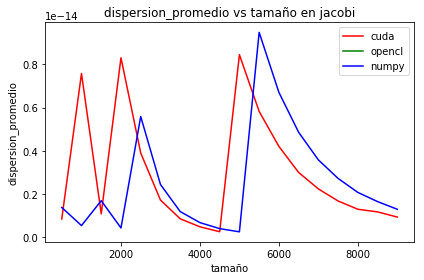

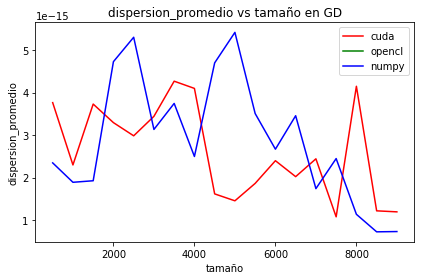

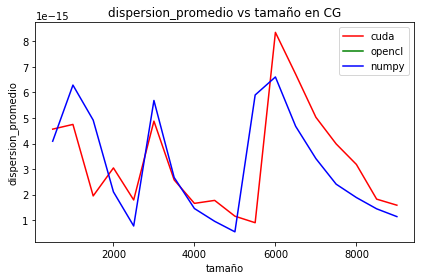

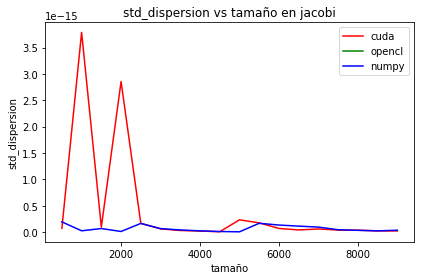

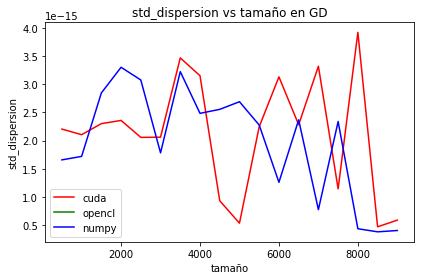

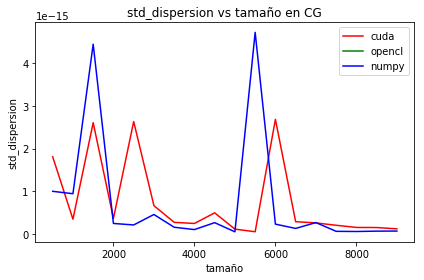

In [4]:
ys = columnas[3:]
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y)